In [58]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt 
from statsmodels.stats.weightstats import ttest_ind as ttest_ind_statsmodels
from scipy.stats import shapiro, ttest_ind, mannwhitneyu
from scipy.stats import skew, kurtosis
from scipy.stats import pearsonr, spearmanr

In [59]:
df = pd.read_csv("dementia_patients_health_data.csv")
df.head(100)

,Diabetic,AlcoholLevel,HeartRate,BloodOxygenLevel,BodyTemperature,Weight,MRI_Delay,Prescription,Dosage in mg,Age,...,Smoking_Status,APOE_ε4,Physical_Activity,Depression_Status,Cognitive_Test_Scores,Medication_History,Nutrition_Diet,Sleep_Quality,Chronic_Health_Conditions,Dementia
0,1,0.084974,98,96.230743,36.224852,57.563978,36.421028,NaN,NaN,60,...,Current Smoker,Negative,Sedentary,No,10,No,Low-Carb Diet,Poor,Diabetes,0
1,0,0.016973,78,93.032122,36.183874,56.832335,31.157633,Galantamine,12.0,61,...,Former Smoker,Positive,Moderate Activity,No,1,Yes,Low-Carb Diet,Poor,Heart Disease,1
2,0,0.009000,89,93.566504,37.326321,59.759066,37.640435,NaN,NaN,69,...,Former Smoker,Negative,Moderate Activity,No,8,No,Mediterranean Diet,Poor,Heart Disease,0
3,0,0.086437,60,93.906510,37.030620,58.266471,50.673992,Donepezil,23.0,78,...,Never Smoked,Negative,Mild Activity,Yes,5,Yes,Balanced Diet,Poor,Hypertension,1
4,1,0.150747,67,97.508994,36.062121,67.705027,27.810601,Memantine,20.0,77,...,Never Smoked,Positive,Mild Activity,No,0,Yes,Low-Carb Diet,Good,Diabetes,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
95,1,0.106571,81,90.911397,37.222030,74.864811,27.373216,Memantine,10.0,66,...,Never Smoked,Positive,Moderate Activity,No,6,Yes,Mediterranean Diet,Poor,Diabetes,1
96,1,0.022258,69,98.869776,36.539323,64.598680,8.015910,NaN,NaN,89,...,Never Smoked,Negative,Mild Activity,No,8,No,Mediterranean Diet,Good,Diabetes,0
97,1,0.019838,93,95.302479,36.962013,51.228662,44.006270,Galantamine,4.0,83,...,Never Smoked,Positive,Mild Activity,No,3,No,Balanced Diet,Good,Diabetes,1
98,1,0.028917,87,93.866333,36.094949,87.234322,41.355597,Memantine,5.0,67,...,Former Smoker,Positive,Moderate Activity,No,2,No,Low-Carb Diet,Good,Diabetes,1


In [60]:
quantitative_vars = ['AlcoholLevel', 'HeartRate', 'BloodOxygenLevel', 'BodyTemperature', 'Weight', 'Age', 'Cognitive_Test_Scores']
qualitative_vars = ['Diabetic', 'Education_Level', 'Gender', 'Family_History', 'Smoking_Status', 'APOE_ε4', 'Physical_Activity', 'Depression_Status', 'Medication_History', 'Nutrition_Diet', 'Sleep_Quality', 'Chronic_Health_Conditions', 'Dementia']
df[qualitative_vars] = df[qualitative_vars].astype('category')


In [61]:
summary_quantitative = df[quantitative_vars].describe().T
summary_quantitative = summary_quantitative[['count', 'mean', 'std', 'min', 'max']]
summary_quantitative.columns = ['N', 'Media', 'Desviación Estándar', 'Mínimo', 'Máximo']
summary_quantitative

,N,Media,Desviación Estándar,Mínimo,Máximo
AlcoholLevel,1000.0,0.098429,0.058715,0.000414,0.199866
HeartRate,1000.0,79.383000,12.107556,60.000000,100.000000
BloodOxygenLevel,1000.0,95.226051,2.929262,90.010677,99.999230
BodyTemperature,1000.0,36.761513,0.431701,36.002108,37.496809
Weight,1000.0,74.321326,14.463765,50.069731,99.982722
Age,1000.0,74.908000,9.095068,60.000000,90.000000
Cognitive_Test_Scores,1000.0,6.383000,3.180633,0.000000,10.000000


In [62]:
for col in quantitative_vars:
    col_skew = skew(df[col], nan_policy='omit')
    col_kurt = kurtosis(df[col], fisher=True, nan_policy='omit') 
    
    print(f"\nColumna: {col}")
    print(f"Asimetría (skew): {col_skew:.4f}")
    print(f"Curtosis: {col_kurt:.4f}")


Columna: AlcoholLevel
Asimetría (skew): 0.0065
Curtosis: -1.2696

Columna: HeartRate
Asimetría (skew): 0.0515
Curtosis: -1.2639

Columna: BloodOxygenLevel
Asimetría (skew): -0.1192
Curtosis: -1.1790

Columna: BodyTemperature
Asimetría (skew): -0.0617
Curtosis: -1.2074

Columna: Weight
Asimetría (skew): 0.0080
Curtosis: -1.2323

Columna: Age
Asimetría (skew): 0.0124
Curtosis: -1.2582

Columna: Cognitive_Test_Scores
Asimetría (skew): -0.6394
Curtosis: -0.8959


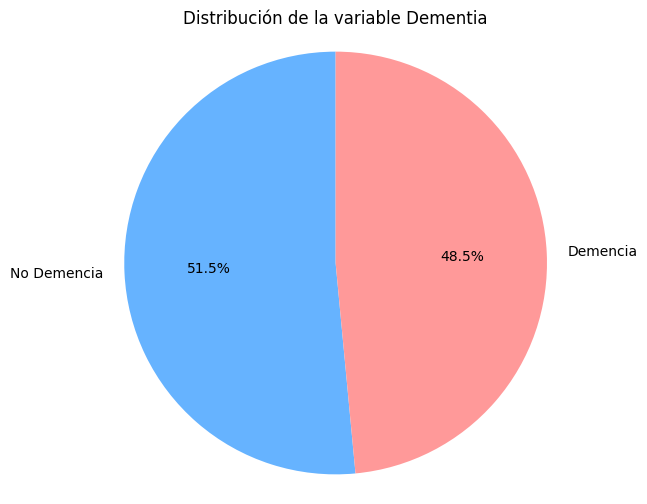

In [63]:
df['Dementia'] = df['Dementia'].map({0: 'No Demencia', 1: 'Demencia'})
dementia_counts = df['Dementia'].value_counts()

plt.figure(figsize=(6, 6))
plt.pie(dementia_counts, labels=dementia_counts.index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff9999'])
plt.title('Distribución de la variable Dementia')
plt.axis('equal')  # para que el pastel quede circular
plt.show()



C:\Users\Jon\AppData\Local\Temp\ipykernel_29780\872029857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


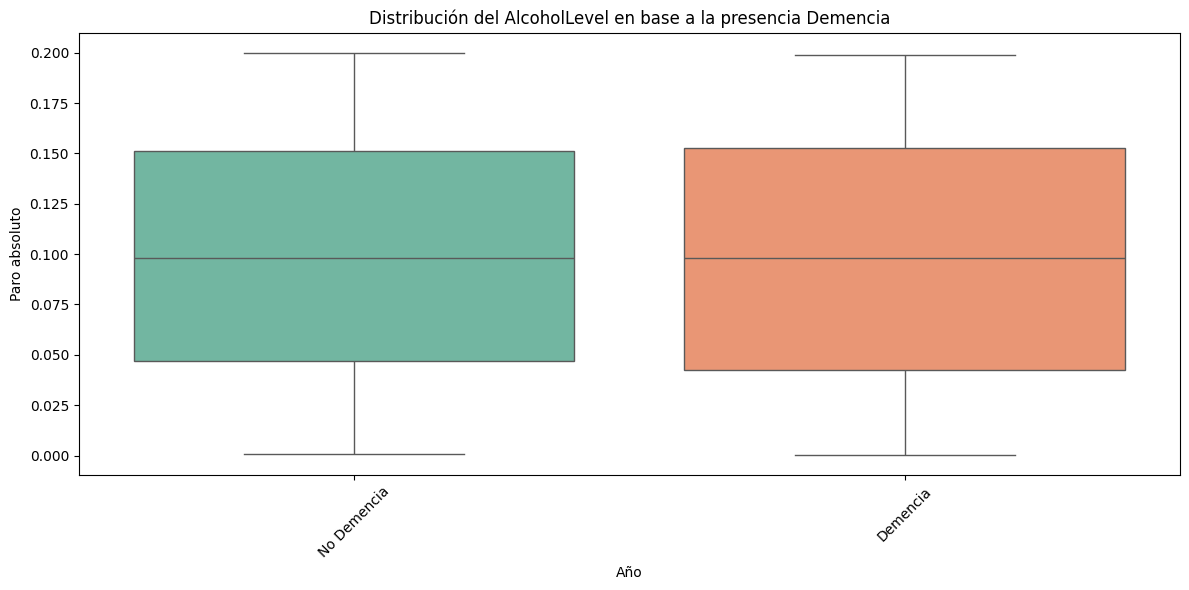

C:\Users\Jon\AppData\Local\Temp\ipykernel_29780\872029857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


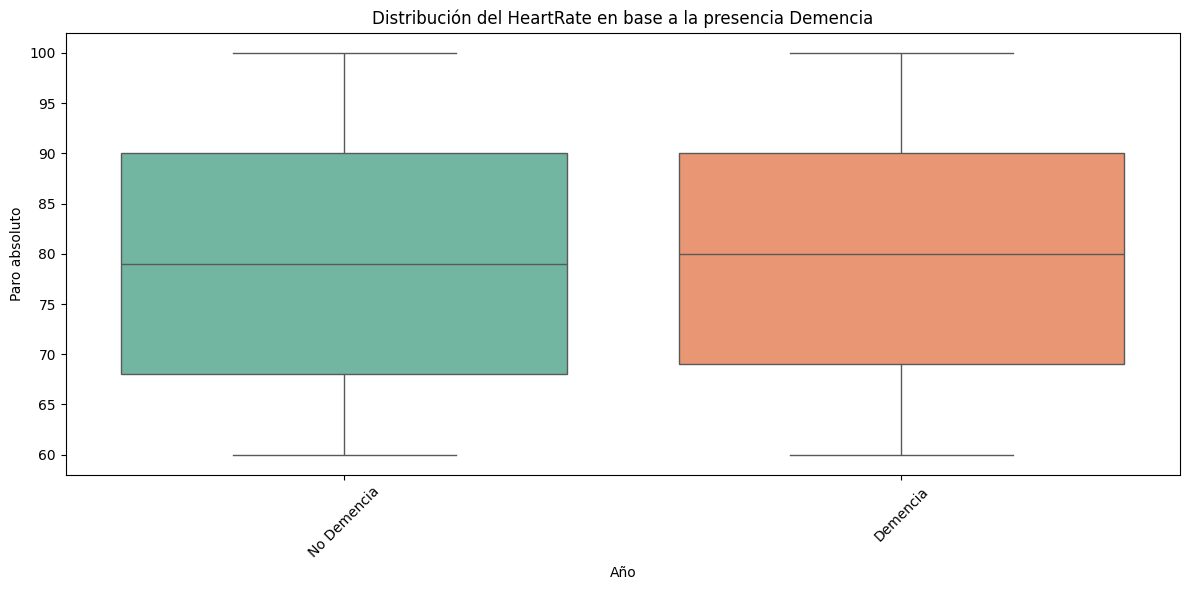

C:\Users\Jon\AppData\Local\Temp\ipykernel_29780\872029857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


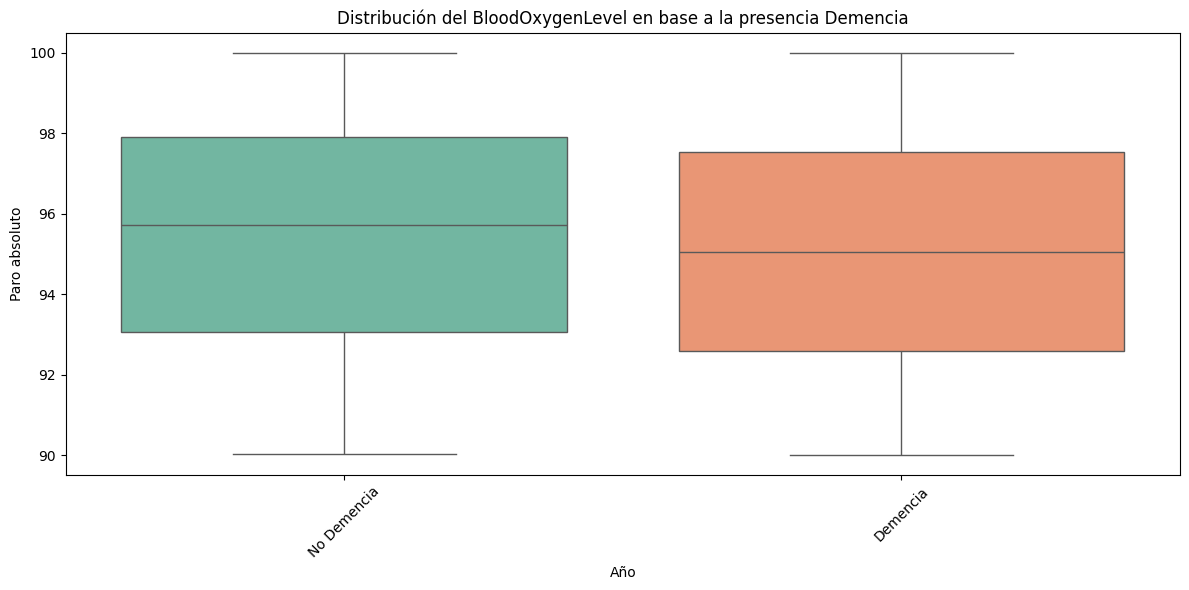

C:\Users\Jon\AppData\Local\Temp\ipykernel_29780\872029857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


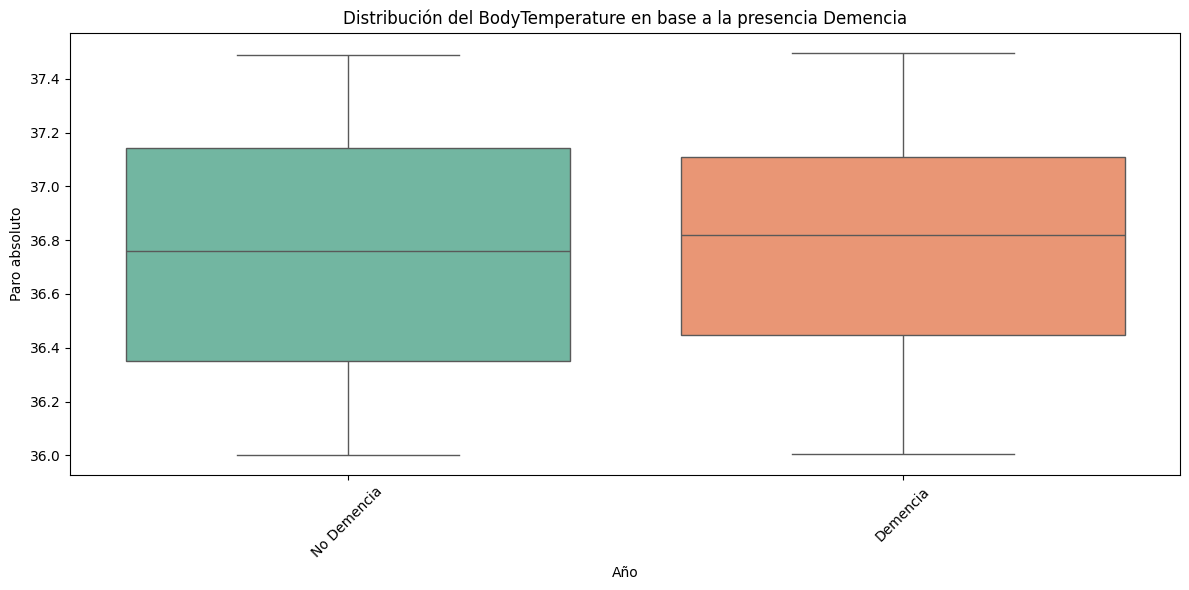

C:\Users\Jon\AppData\Local\Temp\ipykernel_29780\872029857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


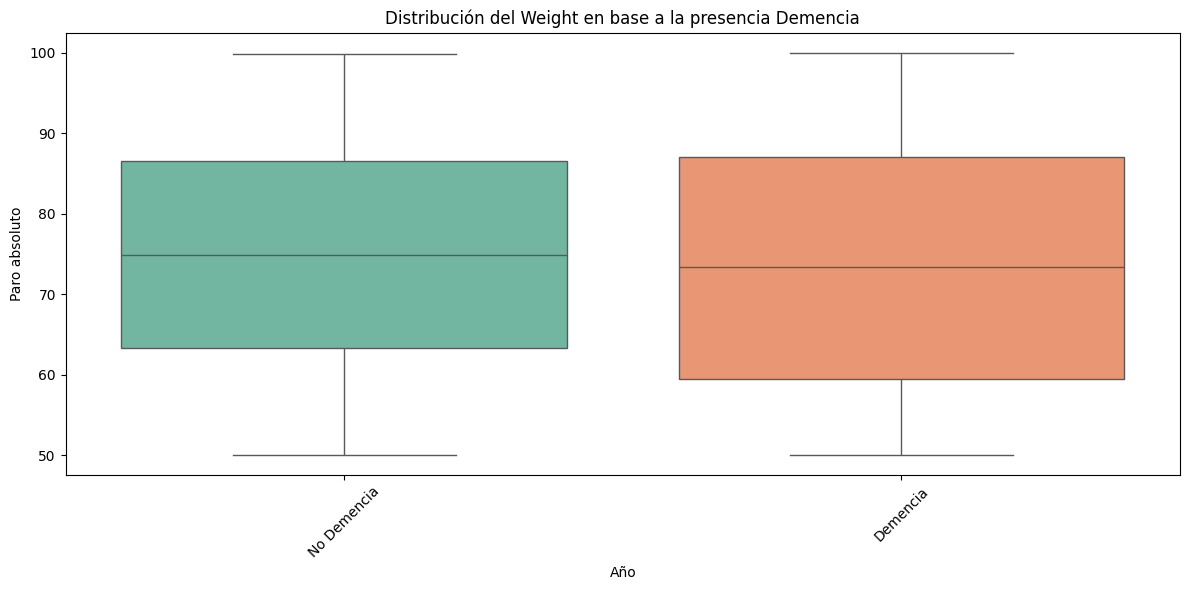

C:\Users\Jon\AppData\Local\Temp\ipykernel_29780\872029857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


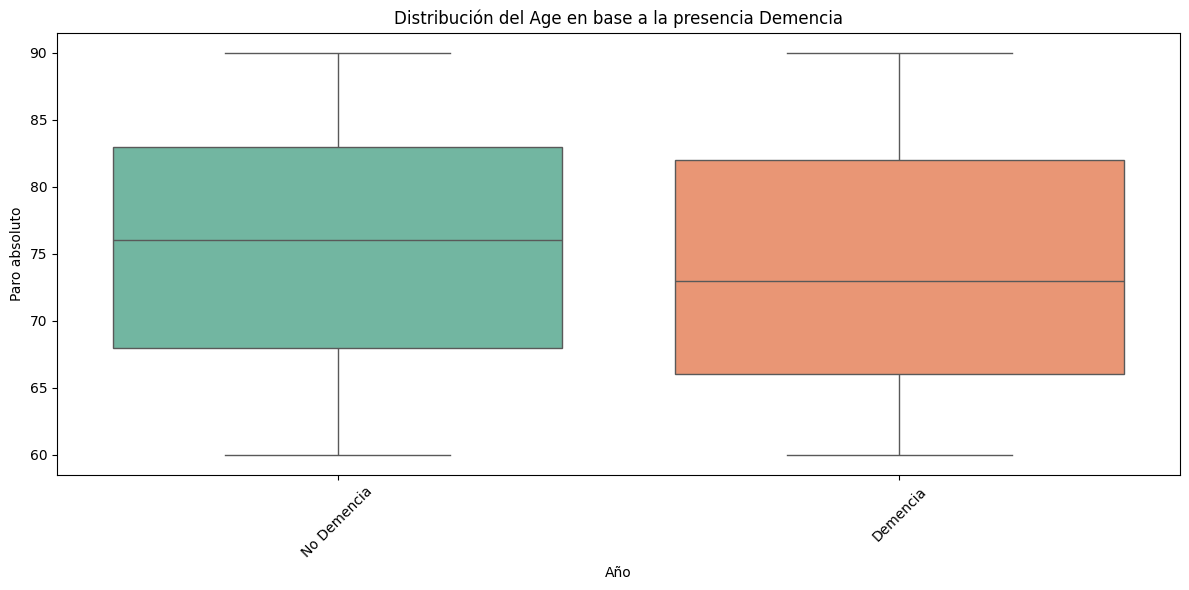

C:\Users\Jon\AppData\Local\Temp\ipykernel_29780\872029857.py:3: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')


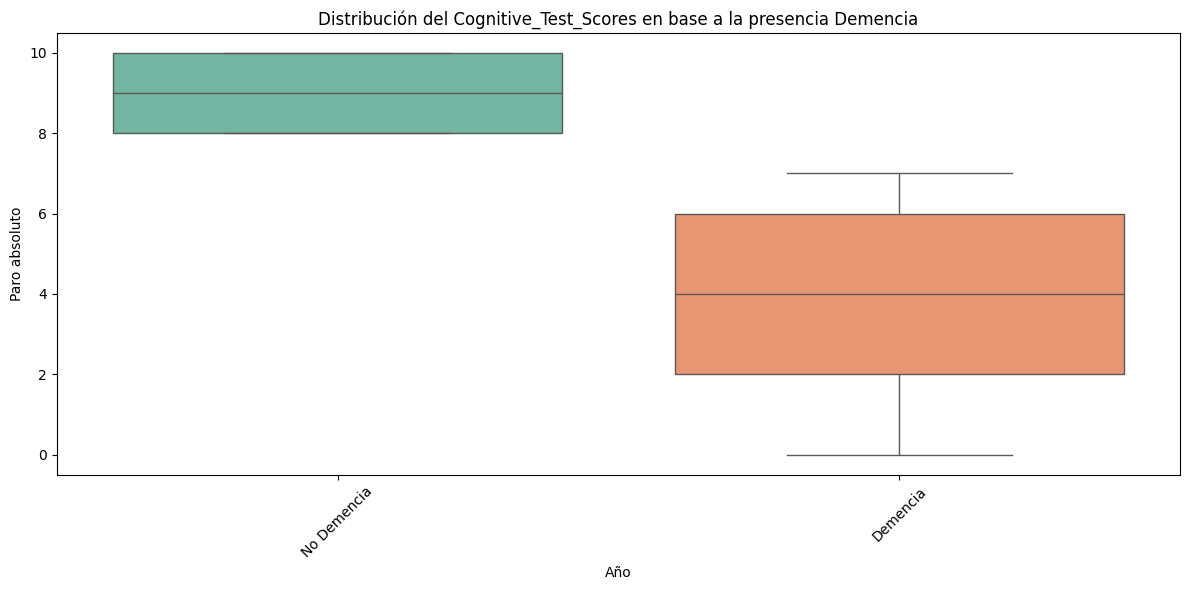

In [64]:

for col in quantitative_vars:
    plt.figure(figsize=(12, 6))
    sns.boxplot(data=df, x='Dementia', y=col, palette='Set2')
    plt.title(f'Distribución del {col} en base a la presencia Demencia')
    plt.xlabel('Año')
    plt.ylabel('Paro absoluto')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()

In [65]:
summary_qualitative = df[qualitative_vars].apply(lambda x: x.value_counts()).T.fillna(0)
summary_qualitative['Total'] = df.shape[0]
summary_qualitative

,0,1,Balanced Diet,Current Smoker,Demencia,Diabetes,Diploma/Degree,Female,Former Smoker,Good,...,No,No Demencia,No School,Poor,Positive,Primary School,Secondary School,Sedentary,Yes,Total
Diabetic,487.0,513.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000
Education_Level,0.0,0.0,0.0,0.0,0.0,0.0,152.0,0.0,0.0,0.0,...,0.0,0.0,155.0,0.0,0.0,389.0,304.0,0.0,0.0,1000
Gender,0.0,0.0,0.0,0.0,0.0,0.0,0.0,504.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000
Family_History,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,480.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,520.0,1000
Smoking_Status,0.0,0.0,0.0,90.0,0.0,0.0,0.0,0.0,458.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000
APOE_ε4,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,694.0,0.0,0.0,0.0,0.0,1000
Physical_Activity,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,331.0,0.0,1000
Depression_Status,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,755.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,245.0,1000
Medication_History,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,486.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,514.0,1000
Nutrition_Diet,0.0,0.0,332.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1000


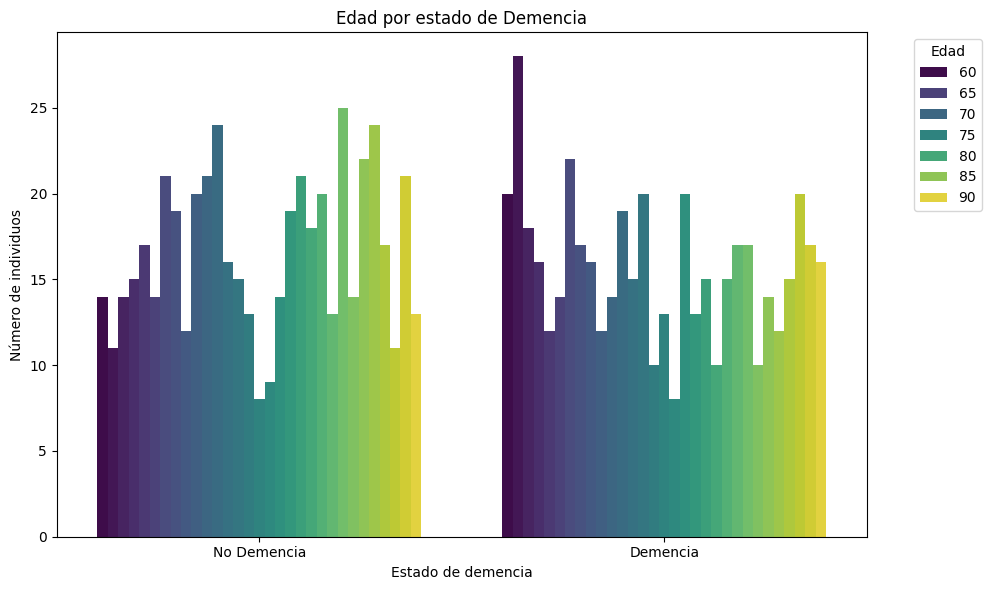

In [66]:
bins = list(range(0, 110, 10))
labels = [f"{i}-{i+9}" for i in bins[:-1]]
df['AgeGroup'] = pd.cut(df['Age'], bins=bins, labels=labels, right=False)


plt.figure(figsize=(10, 6))
sns.countplot(data=df, x='Dementia', hue='Age', palette='viridis', dodge=True)

plt.title('Edad por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Edad', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


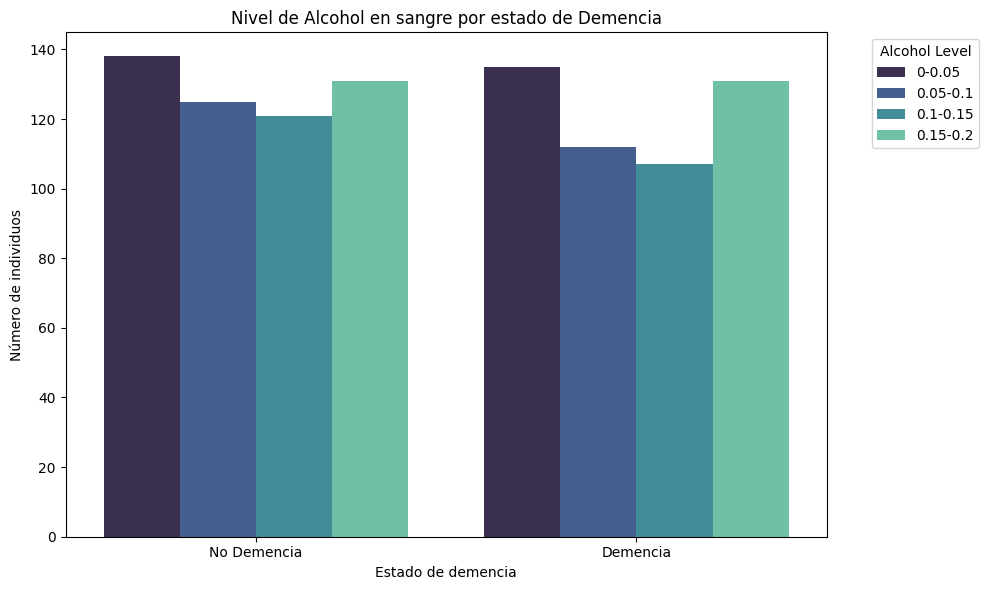

In [67]:

bins = [0.00, 0.05, 0.1, 0.15, 0.2]
labels = ["0-0.05", "0.05-0.1", "0.1-0.15", "0.15-0.2"]

df['AlcoholLevelGroup'] = pd.cut(df['AlcoholLevel'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='AlcoholLevelGroup', palette='mako', dodge=True)

plt.title('Nivel de Alcohol en sangre por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Alcohol Level', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


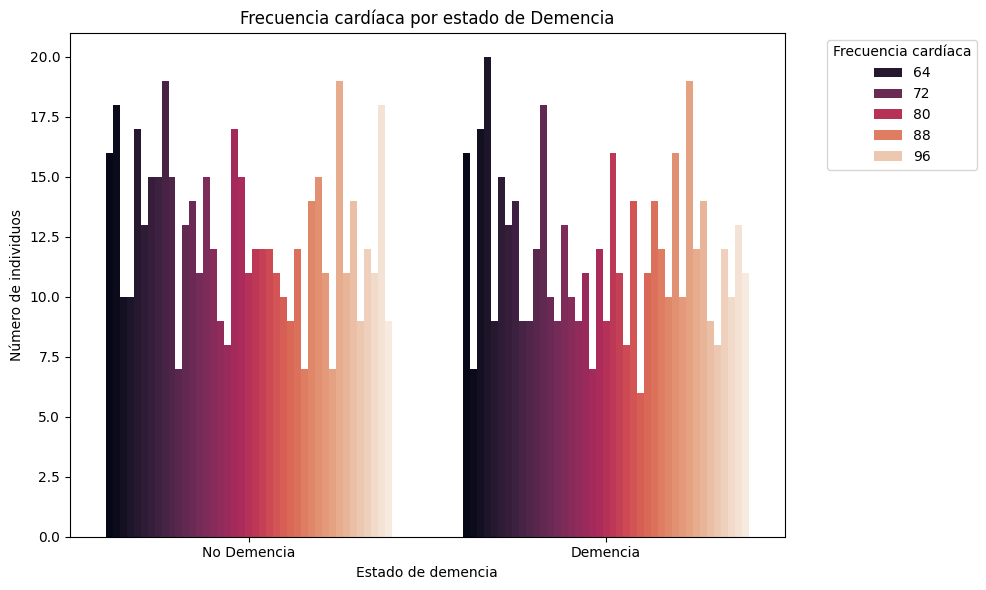

In [68]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='HeartRate', palette='rocket', dodge=True)

plt.title('Frecuencia cardíaca por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Frecuencia cardíaca', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

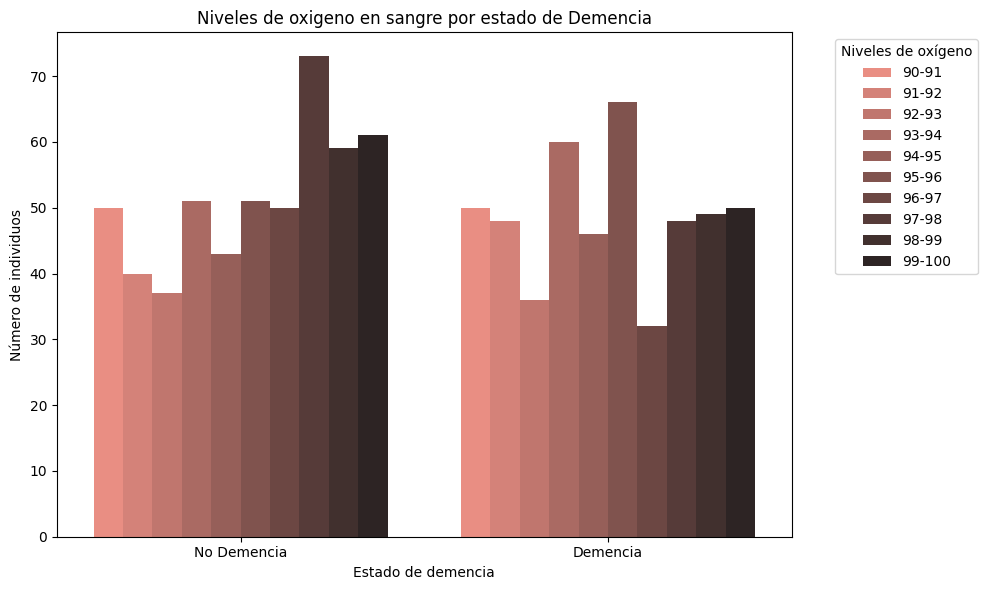

In [69]:
bins = [90, 91, 92, 93, 94, 95, 96, 97, 98, 99, 100]
labels = ["90-91", "91-92", "92-93", "93-94", "94-95", "95-96", "96-97", "97-98", "98-99", "99-100"]

df['BloodOxygenLevel'] = pd.cut(df['BloodOxygenLevel'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='BloodOxygenLevel', palette='dark:salmon_r', dodge=True)

plt.title('Niveles de oxigeno en sangre por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Niveles de oxígeno', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

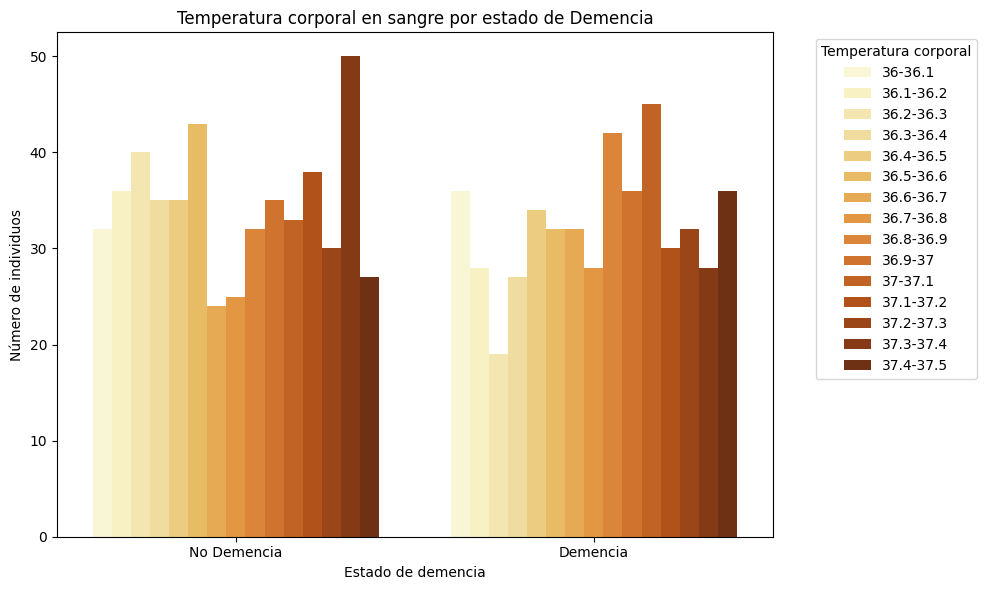

In [70]:
bins = [36, 36.1, 36.2, 36.3, 36.4, 36.5, 36.6, 36.7, 36.8, 36.9, 37, 37.1, 37.2, 37.3, 37.4, 37.5]
labels = ["36-36.1", "36.1-36.2", "36.2-36.3", "36.3-36.4", "36.4-36.5", "36.5-36.6", "36.6-36.7", "36.7-36.8", "36.8-36.9", "36.9-37", "37-37.1", "37.1-37.2", "37.2-37.3", "37.3-37.4", "37.4-37.5"]

df['BodyTemperature'] = pd.cut(df['BodyTemperature'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='BodyTemperature', palette='YlOrBr', dodge=True)

plt.title('Temperatura corporal en sangre por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Temperatura corporal', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

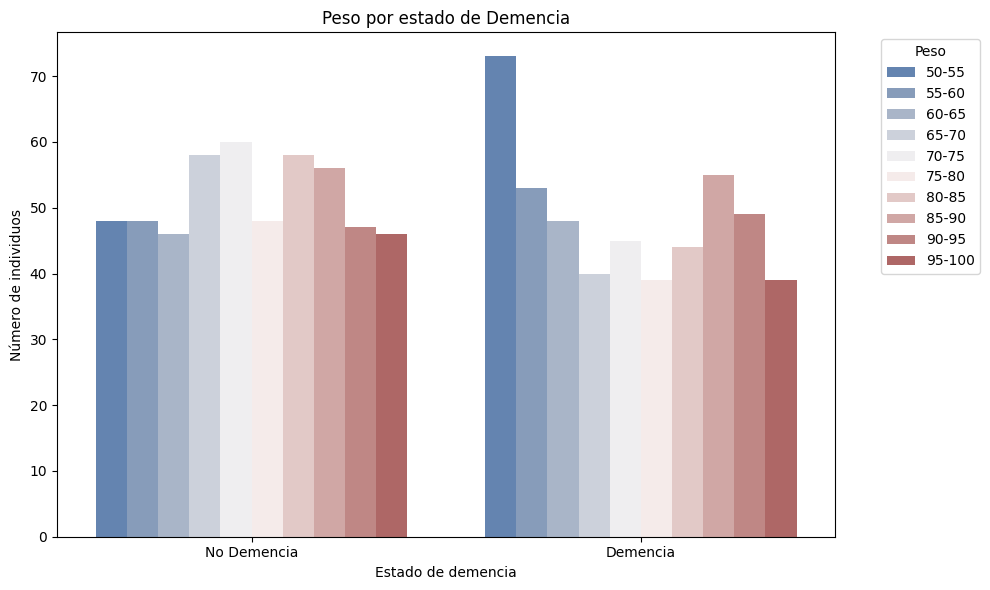

In [71]:
bins = [50, 55, 60, 65, 70, 75, 80, 85, 90, 95, 100]
labels = ["50-55", "55-60", "60-65", "65-70", "70-75", "75-80", "80-85", "85-90", "90-95", "95-100"]

df['Weight'] = pd.cut(df['Weight'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Weight', palette='vlag', dodge=True)

plt.title('Peso por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Peso', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

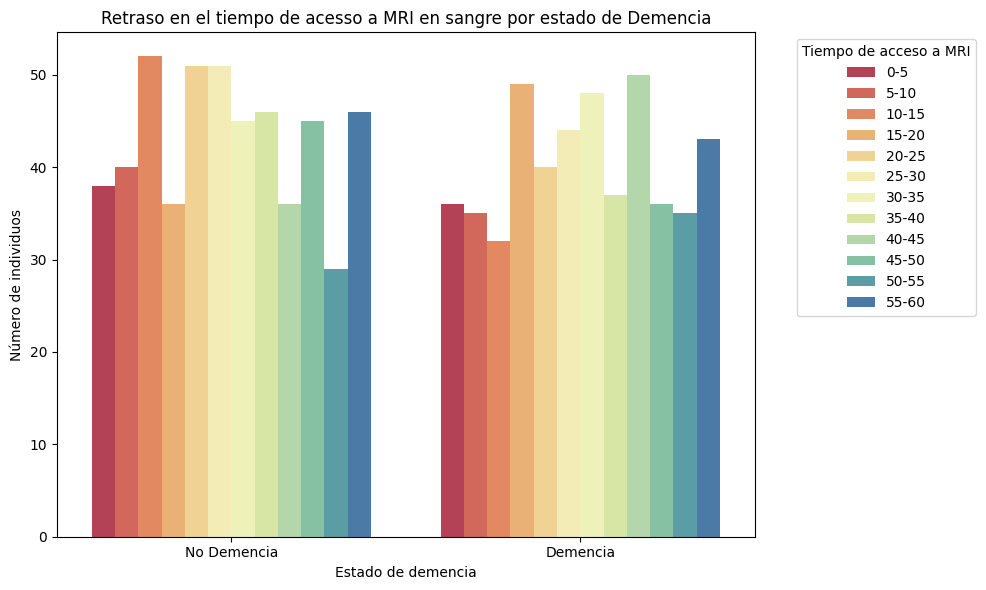

In [72]:
bins = [0, 5, 10, 15, 20, 25, 30, 35, 40, 45, 50, 55, 60]
labels = ["0-5", "5-10", "10-15", "15-20", "20-25", "25-30", "30-35", "35-40", "40-45", "45-50", "50-55", "55-60"]

df['MRI_Delay'] = pd.cut(df['MRI_Delay'], bins=bins, labels=labels, right=False, include_lowest=True)

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='MRI_Delay', palette='Spectral', dodge=True)

plt.title('Retraso en el tiempo de acesso a MRI en sangre por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Tiempo de acceso a MRI', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

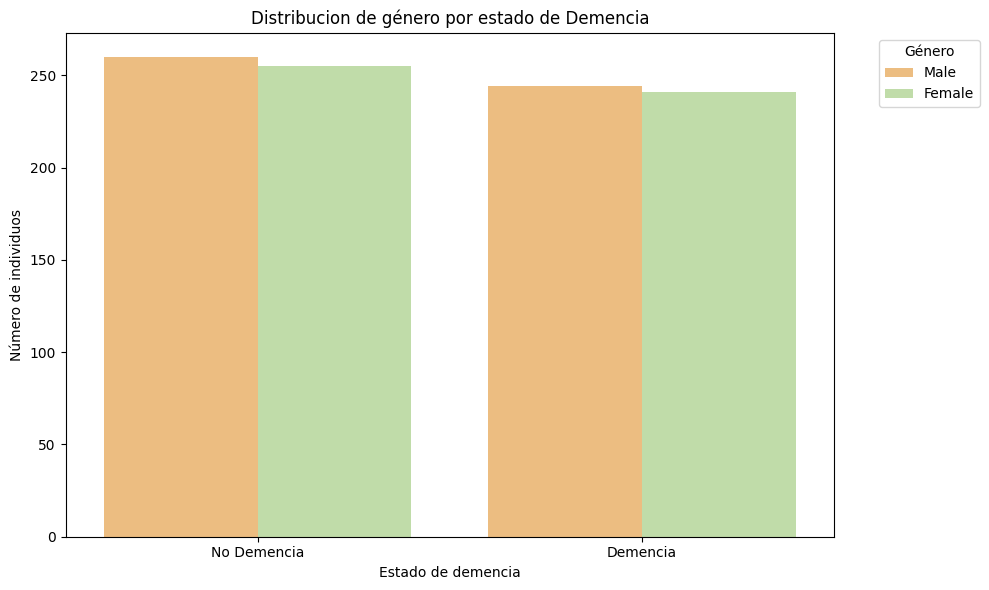

In [73]:

plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Gender', palette='Spectral', dodge=True)

plt.title('Distribucion de género por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Género',labels=['Male', 'Female'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

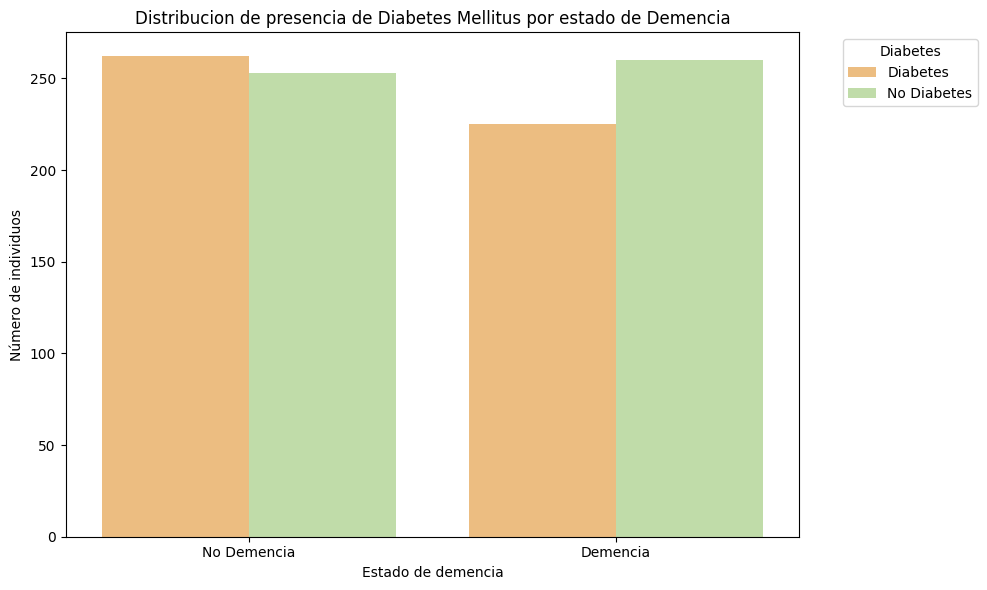

In [74]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Diabetic', palette='Spectral', dodge=True)

plt.title('Distribucion de presencia de Diabetes Mellitus por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Diabetes',labels=['Diabetes', 'No Diabetes'], bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [75]:
df['Education_Level'].unique()


['Primary School', 'Secondary School', 'No School', 'Diploma/Degree']
Categories (4, object): ['Diploma/Degree', 'No School', 'Primary School', 'Secondary School']

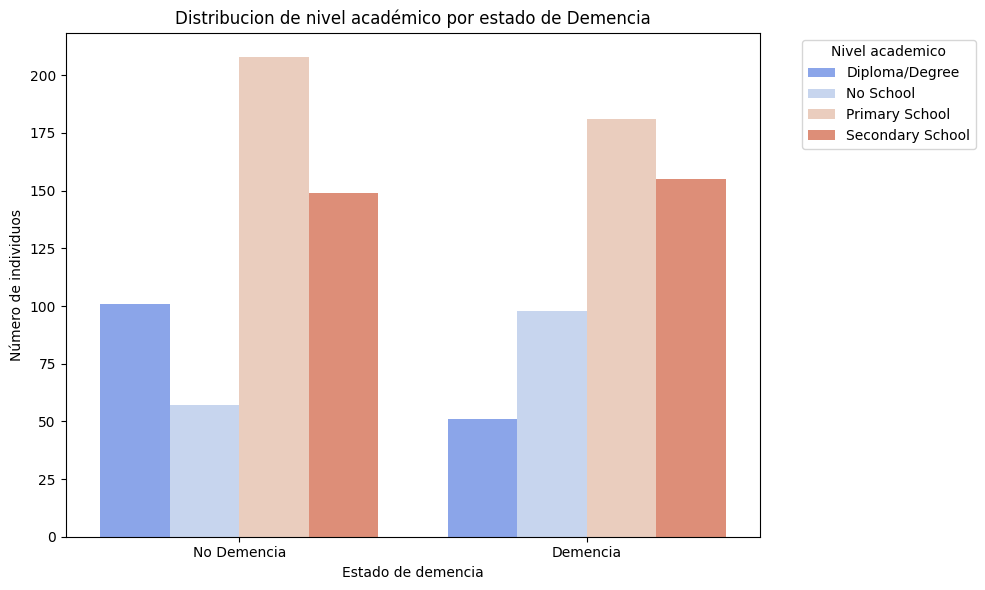

In [76]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Education_Level', palette='coolwarm', dodge=True)

plt.title('Distribucion de nivel académico por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Nivel academico', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

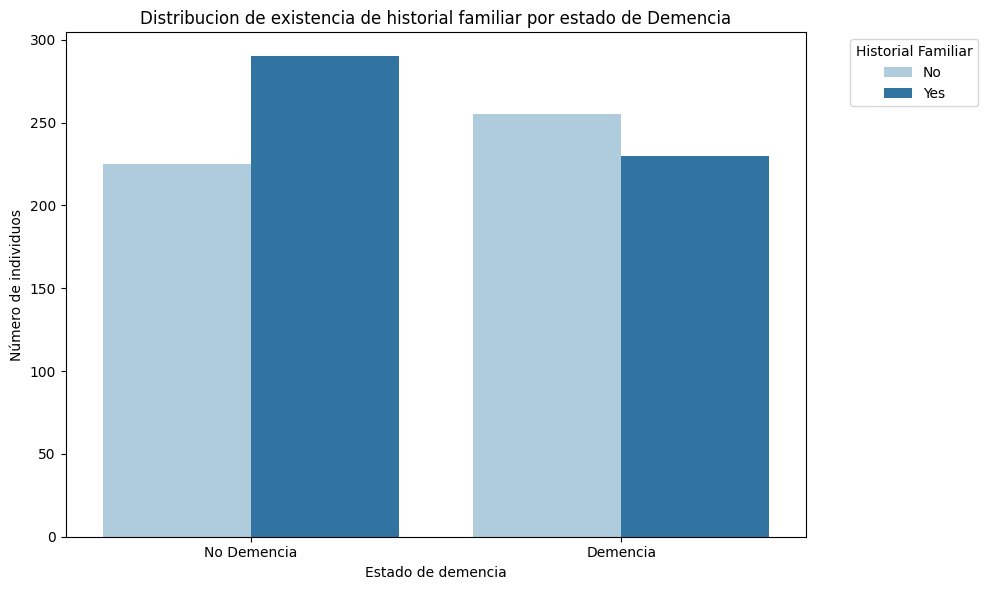

In [77]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Family_History', palette='Paired', dodge=True)

plt.title('Distribucion de existencia de historial familiar por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Historial Familiar', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

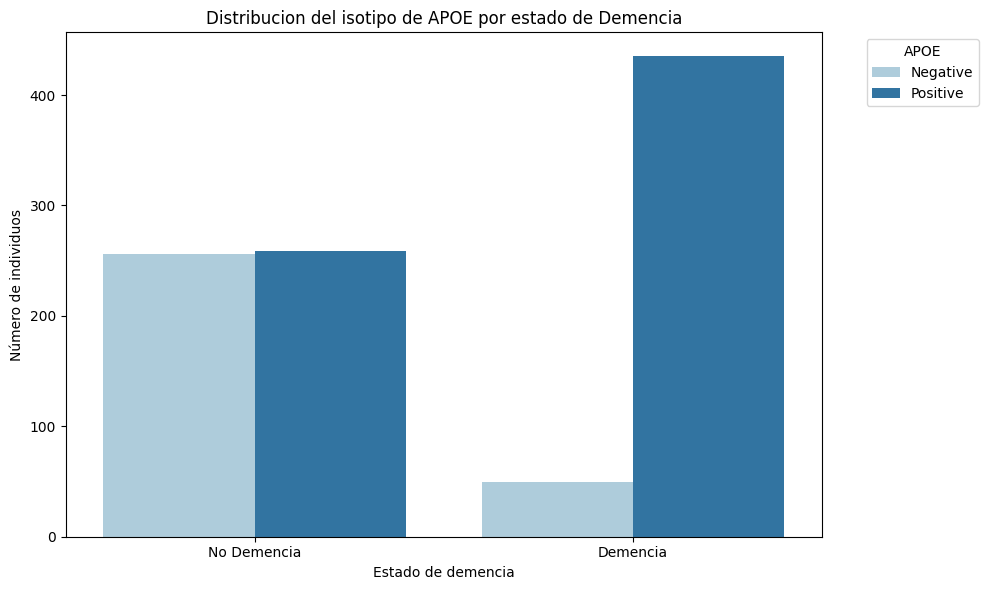

In [78]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='APOE_ε4', palette='Paired', dodge=True)

plt.title('Distribucion del isotipo de APOE por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='APOE', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [79]:
df['Smoking_Status'].unique()

['Current Smoker', 'Former Smoker', 'Never Smoked']
Categories (3, object): ['Current Smoker', 'Former Smoker', 'Never Smoked']

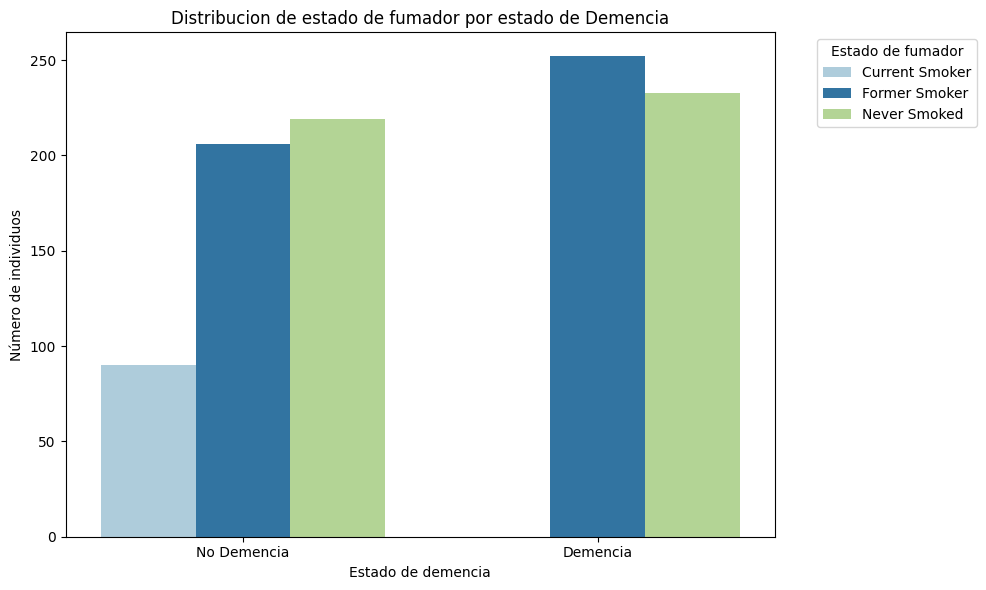

In [80]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Smoking_Status', palette='Paired', dodge=True)

plt.title('Distribucion de estado de fumador por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Estado de fumador', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

In [81]:
df['Physical_Activity'].unique()

['Sedentary', 'Moderate Activity', 'Mild Activity']
Categories (3, object): ['Mild Activity', 'Moderate Activity', 'Sedentary']

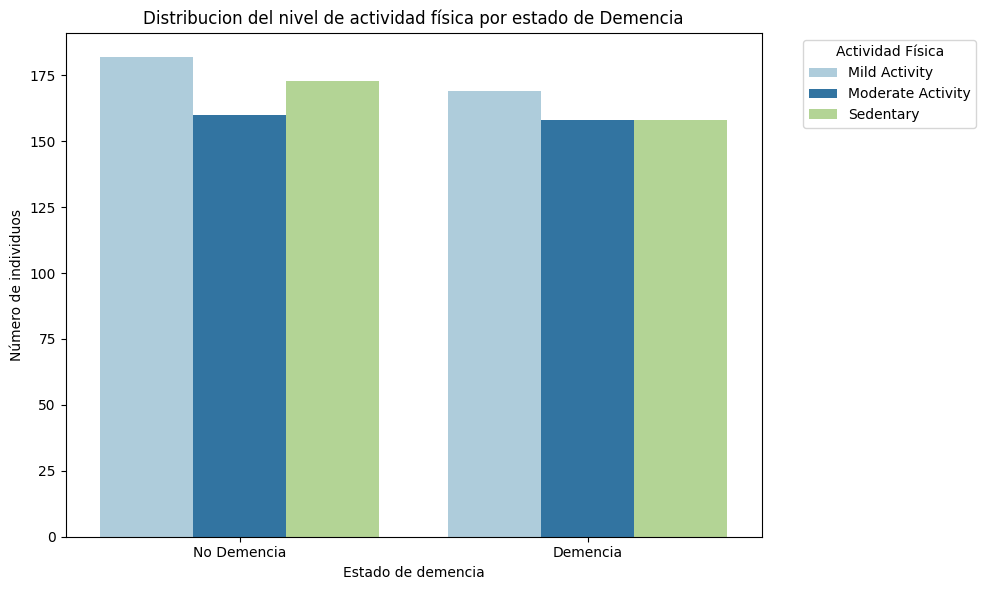

In [82]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Physical_Activity', palette='Paired', dodge=True)

plt.title('Distribucion del nivel de actividad física por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Actividad Física', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

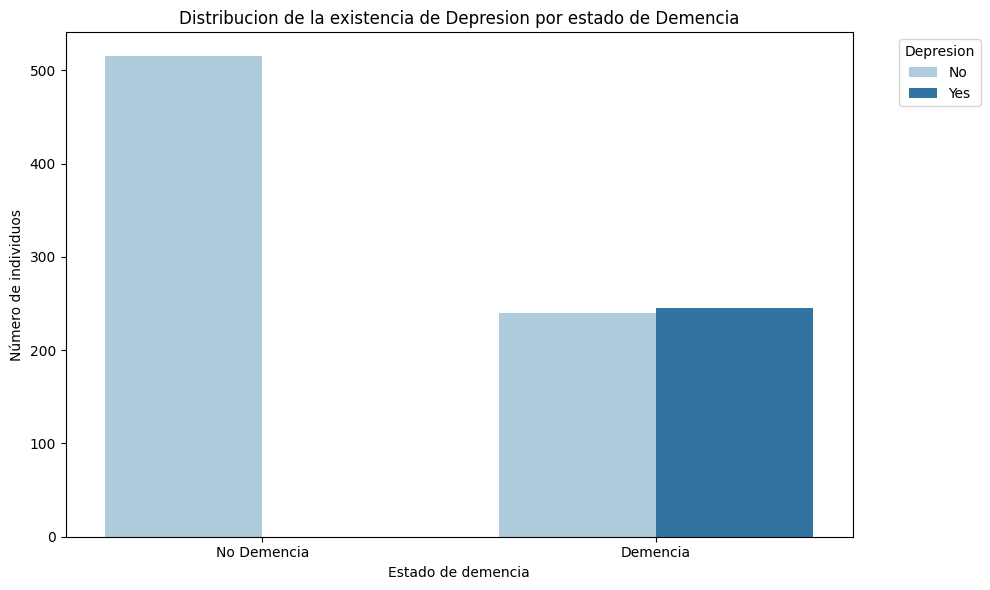

In [83]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Depression_Status', palette='Paired', dodge=True)

plt.title('Distribucion de la existencia de Depresion por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Depresion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

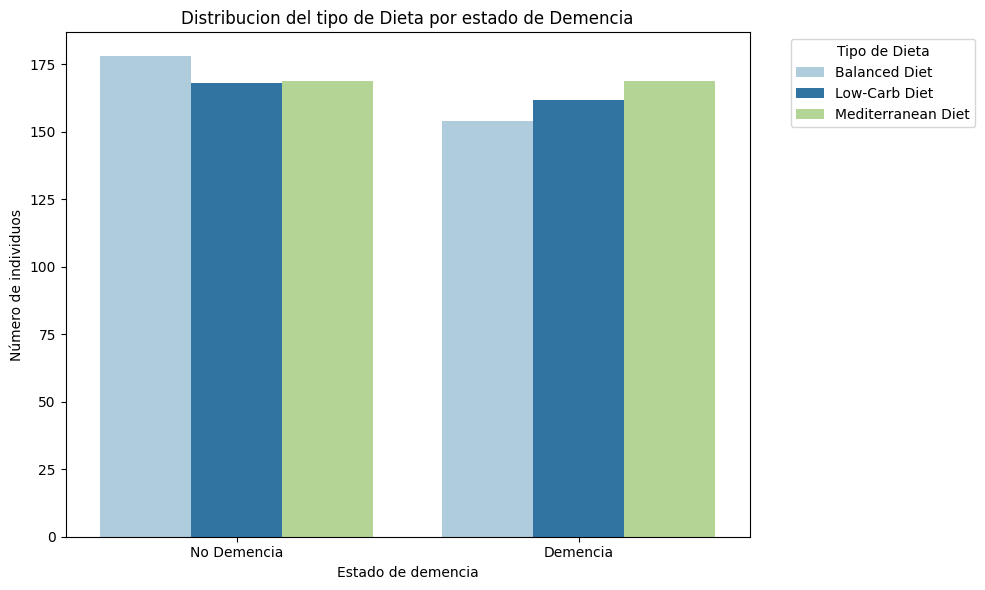

In [84]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Nutrition_Diet', palette='Paired', dodge=True)

plt.title('Distribucion del tipo de Dieta por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Tipo de Dieta', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

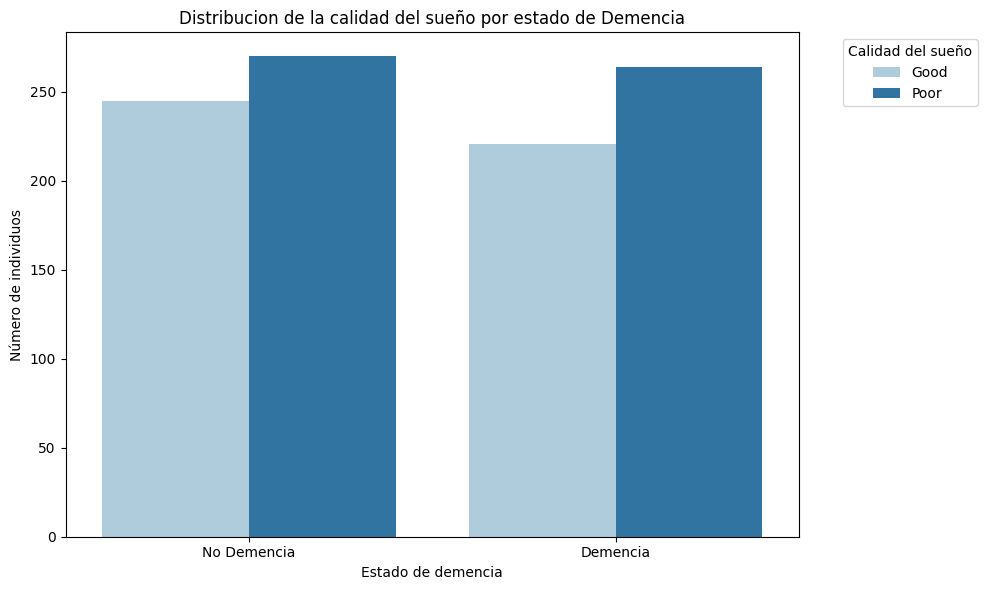

In [85]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Sleep_Quality', palette='Paired', dodge=True)

plt.title('Distribucion de la calidad del sueño por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Calidad del sueño', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

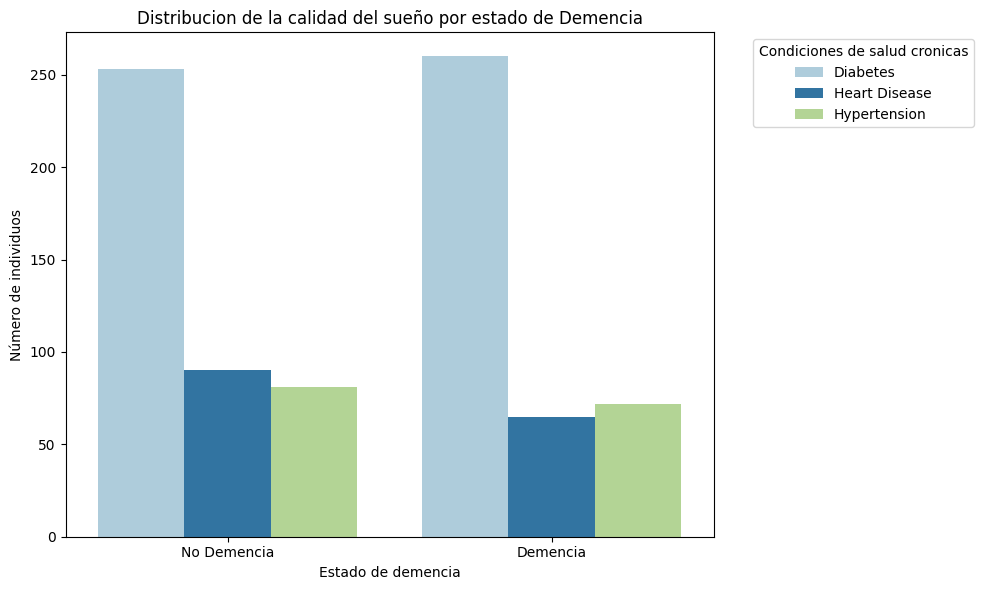

In [86]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Chronic_Health_Conditions', palette='Paired', dodge=True)

plt.title('Distribucion de la calidad del sueño por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Condiciones de salud cronicas', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

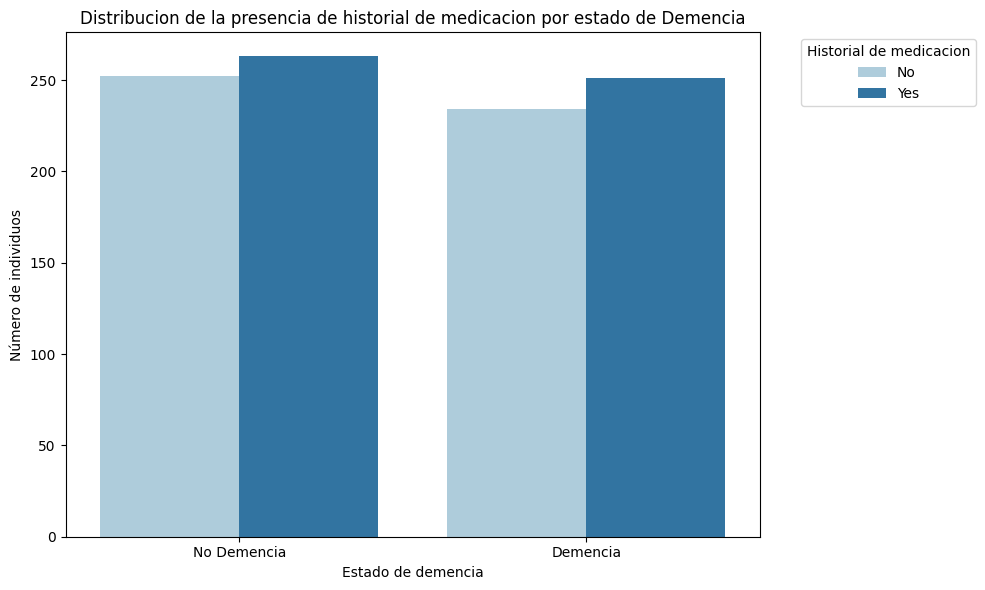

In [87]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Medication_History', palette='Paired', dodge=True)

plt.title('Distribucion de la presencia de historial de medicacion por estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Historial de medicacion', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

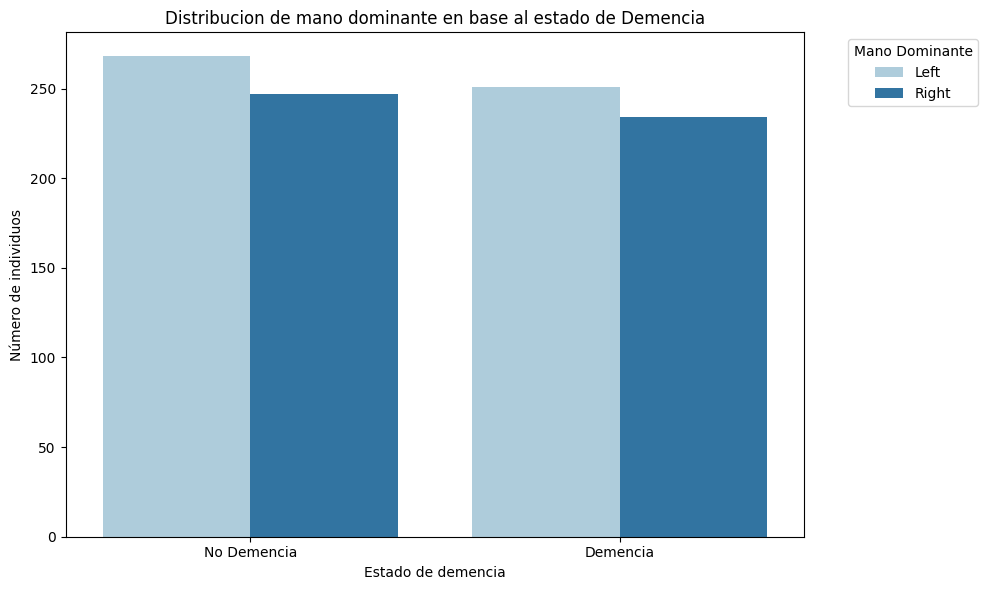

In [88]:
plt.figure(figsize=(10,6))
sns.countplot(data=df, x='Dementia', hue='Dominant_Hand', palette='Paired', dodge=True)

plt.title('Distribucion de mano dominante en base al estado de Demencia')
plt.xlabel('Estado de demencia')
plt.ylabel('Número de individuos')
plt.legend(title='Mano Dominante', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()